In [29]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [60]:
def generate_adjacency_matrix(n):
    matrix = np.random.randint(0, 2, size=(n, n))
    matrix = np.triu(matrix)  
    matrix = matrix + matrix.T - np.diag(matrix.diagonal())  
    np.fill_diagonal(matrix, 0)  
    return matrix

n = 10

matrices = [generate_adjacency_matrix(np.random.randint(5, 8)) for _ in range(n)]

for i, matrix in enumerate(matrices):
    print(f"Matrix {i+1}:\n{matrix}\n")

Matrix 1:
[[0 1 0 0 1]
 [1 0 1 1 0]
 [0 1 0 0 0]
 [0 1 0 0 1]
 [1 0 0 1 0]]

Matrix 2:
[[0 1 0 1 0 1 1]
 [1 0 1 1 0 0 1]
 [0 1 0 0 0 0 1]
 [1 1 0 0 0 1 0]
 [0 0 0 0 0 0 0]
 [1 0 0 1 0 0 1]
 [1 1 1 0 0 1 0]]

Matrix 3:
[[0 0 0 0 1 1 1]
 [0 0 0 0 0 1 1]
 [0 0 0 1 1 0 1]
 [0 0 1 0 0 1 0]
 [1 0 1 0 0 1 1]
 [1 1 0 1 1 0 0]
 [1 1 1 0 1 0 0]]

Matrix 4:
[[0 1 1 0 1]
 [1 0 0 0 0]
 [1 0 0 1 1]
 [0 0 1 0 1]
 [1 0 1 1 0]]

Matrix 5:
[[0 1 1 1 1 1 1]
 [1 0 0 0 0 0 0]
 [1 0 0 1 0 1 0]
 [1 0 1 0 0 1 0]
 [1 0 0 0 0 0 1]
 [1 0 1 1 0 0 1]
 [1 0 0 0 1 1 0]]

Matrix 6:
[[0 0 0 1 1 0 0]
 [0 0 1 1 1 1 0]
 [0 1 0 1 0 1 0]
 [1 1 1 0 1 0 0]
 [1 1 0 1 0 1 1]
 [0 1 1 0 1 0 1]
 [0 0 0 0 1 1 0]]

Matrix 7:
[[0 1 0 1 0 1 0]
 [1 0 0 1 0 1 0]
 [0 0 0 0 1 0 0]
 [1 1 0 0 0 1 0]
 [0 0 1 0 0 1 0]
 [1 1 0 1 1 0 0]
 [0 0 0 0 0 0 0]]

Matrix 8:
[[0 1 0 1 1 1 1]
 [1 0 1 0 1 0 0]
 [0 1 0 0 1 0 1]
 [1 0 0 0 0 0 0]
 [1 1 1 0 0 1 0]
 [1 0 0 0 1 0 1]
 [1 0 1 0 0 1 0]]

Matrix 9:
[[0 1 1 1 0 0 0]
 [1 0 1 0 1 0 0]
 [1 1 0 1 1 1 1]

In [61]:
def plot_graphs_from_adjacency_list(adjacency_matrices, layout='spring', figsize=(6, 4)):
    for i, adj_matrix in enumerate(adjacency_matrices):
        # Convertir la matriz de adyacencia en un grafo de NetworkX
        G = nx.from_numpy_array(adj_matrix)
        
        # Elegir el layout
        if layout == 'spring':
            pos = nx.spring_layout(G)
        elif layout == 'circular':
            pos = nx.circular_layout(G)
        elif layout == 'spectral':
            pos = nx.spectral_layout(G)
        elif layout == 'kamada_kawai':
            pos = nx.kamada_kawai_layout(G)
        else:
            raise ValueError(f"Layout desconocido: {layout}")
        
        # Graficar
        plt.figure(figsize=figsize)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
        plt.title(f"Grafo {i+1}")
        plt.show()

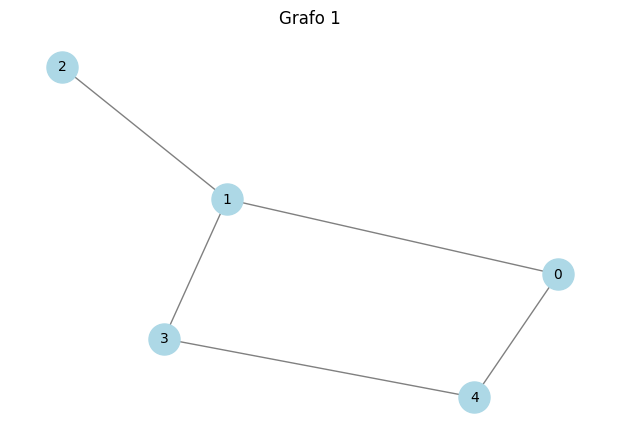

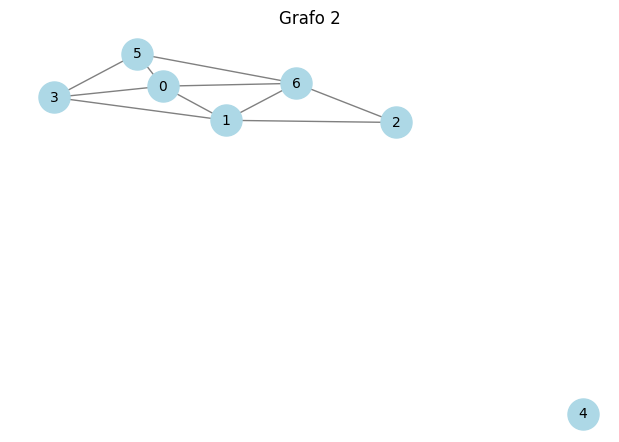

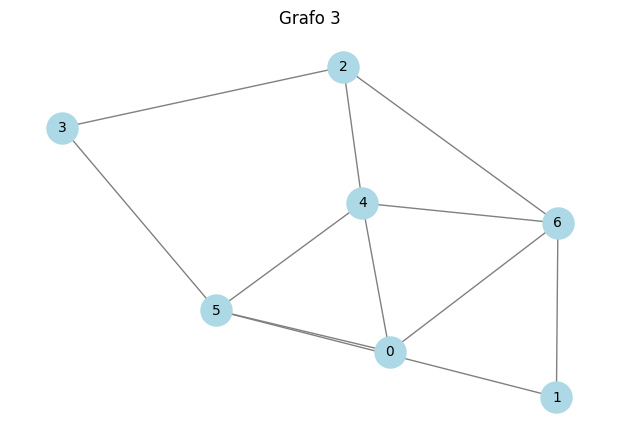

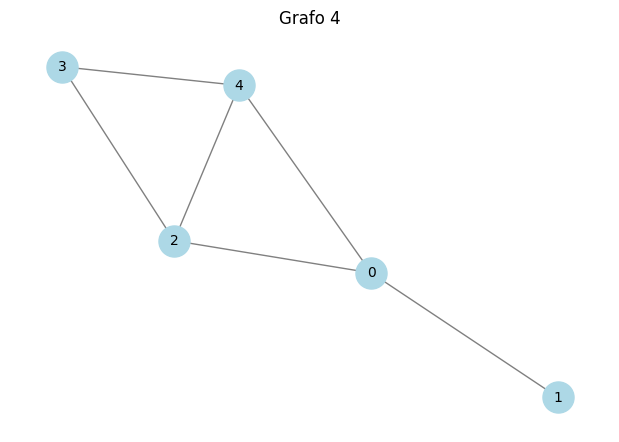

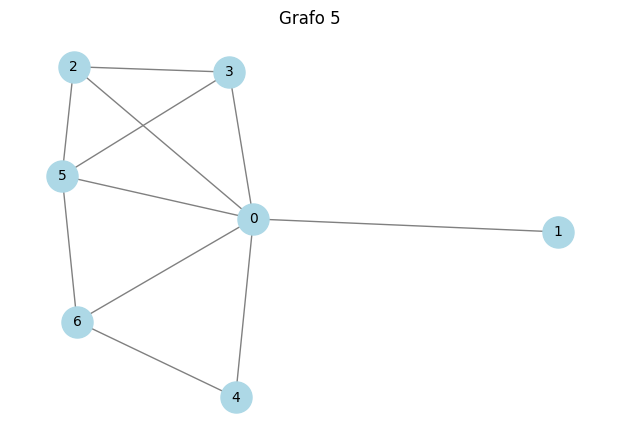

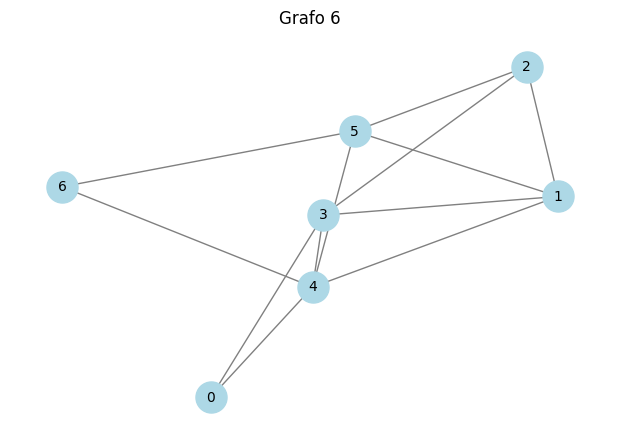

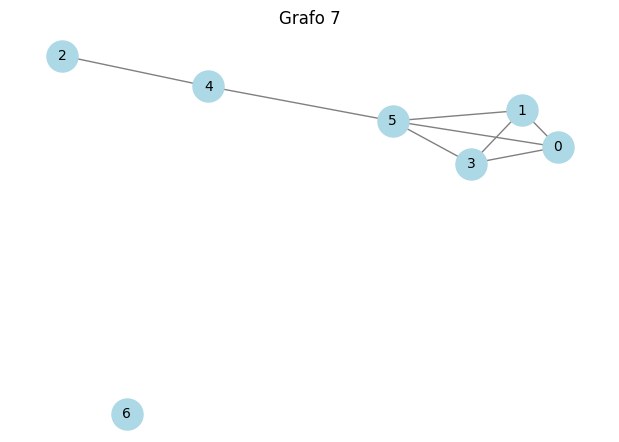

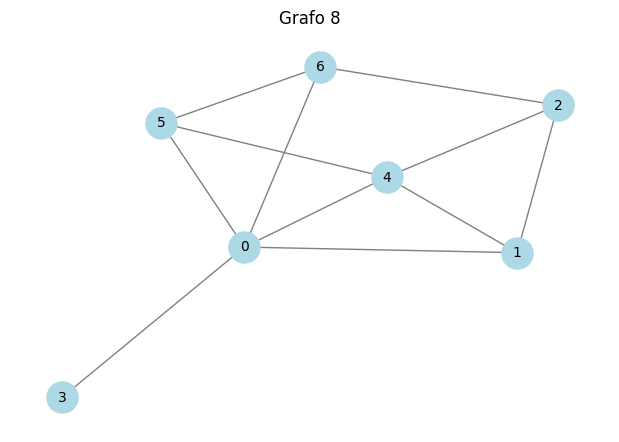

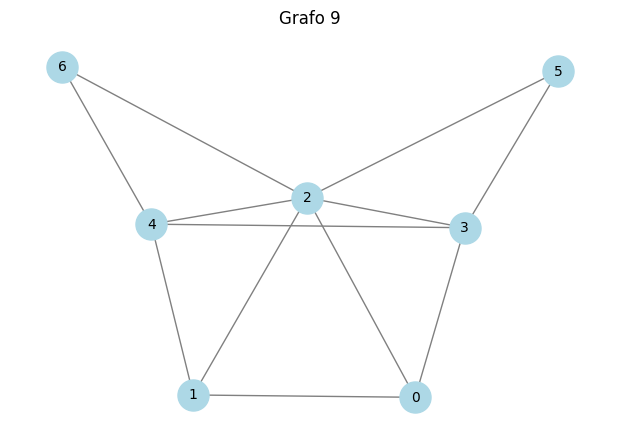

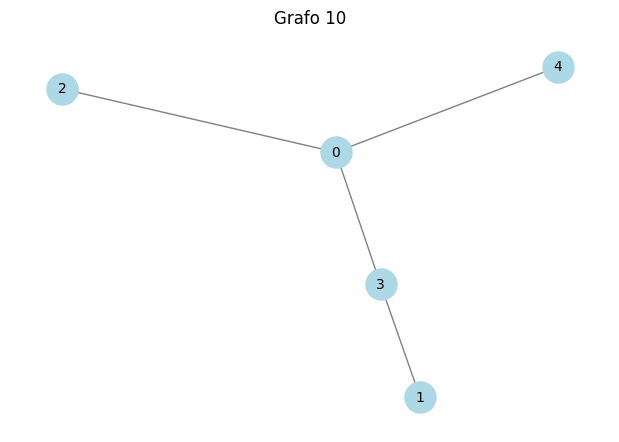

In [62]:
plot_graphs_from_adjacency_list(matrices)

In [63]:
def floyd_warshall(matrix):
    n = len(matrix)
    dist = np.copy(matrix)
    dist = np.float64(dist)
    dist[dist == 0] = np.inf
    np.fill_diagonal(dist, 0)

    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i, j] = min(dist[i, j], dist[i, k] + dist[k, j])
    
    return dist


distances = []
print("Distancias entre nodos:\n")
for i, matrix in enumerate(matrices):
    distances.append(floyd_warshall(matrix))
    print(f"Matrix {i+1}:\n{distances[-1]}\n")

Distancias entre nodos:

Matrix 1:
[[0. 1. 2. 2. 1.]
 [1. 0. 1. 1. 2.]
 [2. 1. 0. 2. 3.]
 [2. 1. 2. 0. 1.]
 [1. 2. 3. 1. 0.]]

Matrix 2:
[[ 0.  1.  2.  1. inf  1.  1.]
 [ 1.  0.  1.  1. inf  2.  1.]
 [ 2.  1.  0.  2. inf  2.  1.]
 [ 1.  1.  2.  0. inf  1.  2.]
 [inf inf inf inf  0. inf inf]
 [ 1.  2.  2.  1. inf  0.  1.]
 [ 1.  1.  1.  2. inf  1.  0.]]

Matrix 3:
[[0. 2. 2. 2. 1. 1. 1.]
 [2. 0. 2. 2. 2. 1. 1.]
 [2. 2. 0. 1. 1. 2. 1.]
 [2. 2. 1. 0. 2. 1. 2.]
 [1. 2. 1. 2. 0. 1. 1.]
 [1. 1. 2. 1. 1. 0. 2.]
 [1. 1. 1. 2. 1. 2. 0.]]

Matrix 4:
[[0. 1. 1. 2. 1.]
 [1. 0. 2. 3. 2.]
 [1. 2. 0. 1. 1.]
 [2. 3. 1. 0. 1.]
 [1. 2. 1. 1. 0.]]

Matrix 5:
[[0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 2. 2. 2. 2. 2.]
 [1. 2. 0. 1. 2. 1. 2.]
 [1. 2. 1. 0. 2. 1. 2.]
 [1. 2. 2. 2. 0. 2. 1.]
 [1. 2. 1. 1. 2. 0. 1.]
 [1. 2. 2. 2. 1. 1. 0.]]

Matrix 6:
[[0. 2. 2. 1. 1. 2. 2.]
 [2. 0. 1. 1. 1. 1. 2.]
 [2. 1. 0. 1. 2. 1. 2.]
 [1. 1. 1. 0. 1. 2. 2.]
 [1. 1. 2. 1. 0. 1. 1.]
 [2. 1. 1. 2. 1. 0. 1.]
 [2. 2. 2. 2. 1. 1. 0.]]

Ma

In [64]:
def dirac_delta(x, y):
    return 1 if x == y else 0

def gaussian(x, y, sigma = 5):
    return np.exp(-np.abs(x - y) / (2 * sigma**2))

In [65]:
def shortest_path_kernel(distances1, distances2, kernel1, kernel2):
    K = 0
    n = len(distances1)
    m = len(distances2)
    for i in range(n):
        for j in range(i, n):
            for ii in range(m):
                for jj in range(ii, m):
                    if distances1[i, j] == np.inf or distances2[ii, jj] == np.inf:
                        continue
                    K += kernel1(distances1[i, j], distances2[ii, jj]) * kernel2(i, ii) * kernel2(j, jj)
    return K

In [66]:
def gram_matrix(distances):
    n = len(distances)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            K[i, j] = shortest_path_kernel(distances[i], distances[j], gaussian, dirac_delta)
            K[j, i] = K[i, j]
    return K

In [67]:
K = gram_matrix(distances)

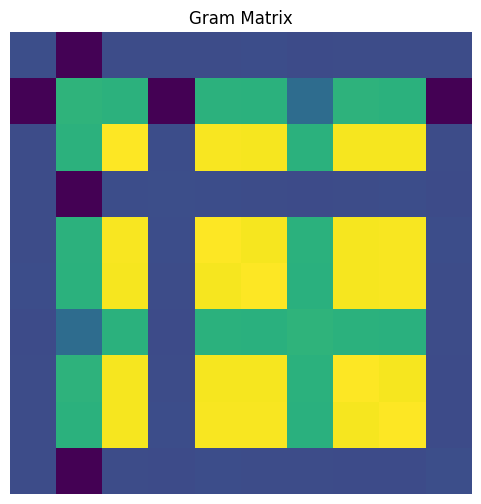

In [69]:
plt.figure(figsize=(6, 6))
plt.imshow(K, cmap='viridis')
plt.title('Gram Matrix')
plt.axis('off')
plt.show()